#AUTOLIB BLUE CAR HYPOTHESIS TESTING

**a) Data Analytic Questions**

  *We need to identify some areas and periods of interest which we will subject to  hypothesis testing to check if the number of Blue cars taken in area X different than in area Y.*


**b) Success Metrics**

*   Sucessful Exploratory Data Analysis.
*   Sucessful univariate and multivariate analysis.
*   Sucessful sampling and Test of Hypothesis.
*   Interpretation of results and drawiing conclussion.

**c) context**

*The Autolib’ service was launched in Paris on October 2nd, 2011. At that time, it had 66 cars and 33 car rental stations. By the day it was launched, the service was still not perfect, but it was the start of what is still the largest urban electric car-sharing scheme in the world, allowing drivers to rent a car at one location and return it to a different location. Other car-sharing schemes have generally not used electric cars, and usually the driver has to return the car to the place where he rented it.*


**d) Experimental Design**


*Formulation of the research question*


*   Loading the data
*   Exploratory Data Analysis
*   Univariate and Multivariate analysis
*   Formulating the nullhypothesis
*   Sample size determination
*   Data Sampling and Test of Hypothesis
*   Interpretation of results and drawing conclussion
*   Challenge the solution
*   Follow up


#DATA ANALYSIS AND HYPOTHESIS TESTING


#Loading required libraries

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from statsmodels.stats.power import TTestIndPower



#READING IN THE AUTOLIB DATASET

*Glossary*

In [68]:
#Data containg Headers and their respective exlanation.
Autolib_data_glossary = pd.read_excel('columns_explanation.xlsx')
Autolib_data_glossary 


,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


*Working data*

In [69]:
#The Autolib_dataset
url_path_data = 'http://bit.ly/DSCoreAutolibDataset'
Autolib_data = pd.read_csv(url_path_data)


#Check out the Data

In [70]:
#Previewing the top of our dataset
Autolib_data.head(3)


,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27


In [71]:
#Previewing the bottom of our dataset
Autolib_data.tail(3)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


*Shape our dataset.*

In [72]:
#Shape our dataset.
Autolib_data.shape

(16085, 13)

*Check out variables types and descriptive statistics*

In [73]:
#Check whether each column has an appropriate datatype.
Autolib_data.dtypes


Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [74]:
# Next we change variable types for object date and day_type.
Autolib_data["date"] =  pd.to_datetime(Autolib_data["date"])
Autolib_data["day_type"] = Autolib_data["day_type"].astype('category')


In [75]:
#Generate descriptive statistics for Autolib_dataset.
Autolib_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Postal code             16085 non-null  int64         
 1   date                    16085 non-null  datetime64[ns]
 2   n_daily_data_points     16085 non-null  int64         
 3   dayOfWeek               16085 non-null  int64         
 4   day_type                16085 non-null  category      
 5   BlueCars_taken_sum      16085 non-null  int64         
 6   BlueCars_returned_sum   16085 non-null  int64         
 7   Utilib_taken_sum        16085 non-null  int64         
 8   Utilib_returned_sum     16085 non-null  int64         
 9   Utilib_14_taken_sum     16085 non-null  int64         
 10  Utilib_14_returned_sum  16085 non-null  int64         
 11  Slots_freed_sum         16085 non-null  int64         
 12  Slots_taken_sum         16085 non-null  int64 

#DATA PREPARATION

#Tidying the Dataset


*Standardize column names*





In [76]:
# Standardize column names

Autolib_data.columns = ['Postal_code','date','daily_data_points','day_of_Week','day_type','BlueCars_taken_sum','BlueCars_returned_sum',
                        'Utilib_taken_sum','Utilib_returned_sum','Utilib_14_taken_sum','Utilib_14_returned_sum','Slots_freed_sum','Slots_taken_sum']  
Autolib_data.head(3)

,Postal_code,date,daily_data_points,day_of_Week,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,2018-01-01,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,2018-01-02,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,2018-01-03,1439,2,weekday,138,139,0,0,2,2,27,27


Name the week days in a new column

In [77]:
day_of_Week={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
Autolib_data['Week_day'] = Autolib_data['date'].dt.dayofweek.map(day_of_Week)
Autolib_data.head(5)



,Postal_code,date,daily_data_points,day_of_Week,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum,Week_day
0,75001,2018-01-01,1440,0,weekday,110,103,3,2,10,9,22,20,Monday
1,75001,2018-01-02,1438,1,weekday,98,94,1,1,8,8,23,22,Tuesday
2,75001,2018-01-03,1439,2,weekday,138,139,0,0,2,2,27,27,Wednesday
3,75001,2018-01-04,1320,3,weekday,104,104,2,2,9,8,25,21,Thursday
4,75001,2018-01-05,1440,4,weekday,114,117,3,3,6,6,18,20,Friday


*Missing value analysis*

In [78]:
#Check if there are any null values in the dataset.

Autolib_data.isnull().sum()

Postal_code               0
date                      0
daily_data_points         0
day_of_Week               0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
Week_day                  0
dtype: int64

*Check for duplicate values*

In [79]:
Autolib_data.duplicated().values.any()

False

*Select only data  for the postal codes of intrest*

In [80]:
Autolib_data=Autolib_data[Autolib_data.Postal_code.isin([75015,75017])]
Autolib_data.head(3)

,Postal_code,date,daily_data_points,day_of_Week,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum,Week_day
2184,75015,2018-01-01,1440,0,weekday,781,843,16,21,65,68,202,215,Monday
2185,75015,2018-01-02,1438,1,weekday,710,720,21,20,50,49,191,193,Tuesday
2186,75015,2018-01-03,1439,2,weekday,739,752,31,30,65,67,194,201,Wednesday


#*Outlier detection analysis*

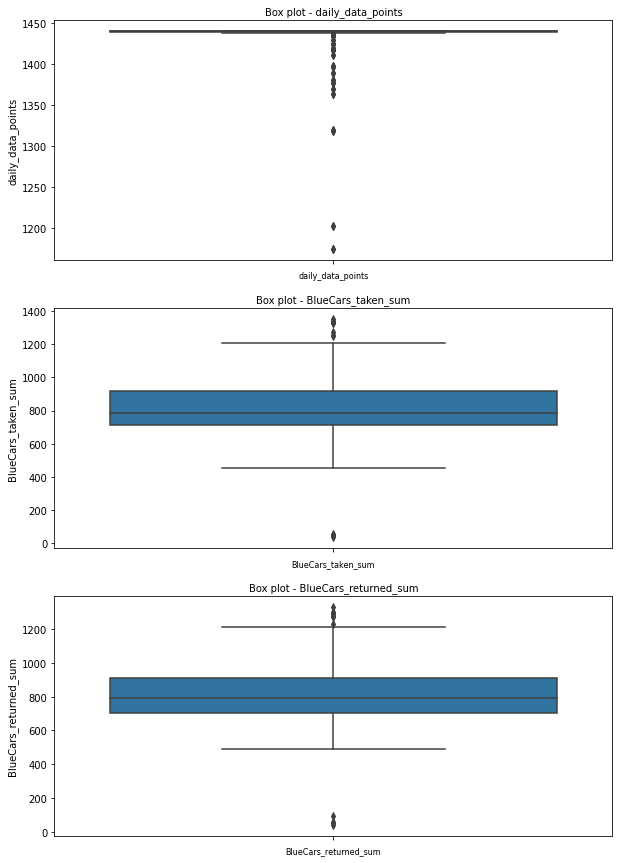

In [40]:
col_names= ['daily_data_points','BlueCars_taken_sum','BlueCars_returned_sum']
                        #'Utilib_taken_sum','Utilib_returned_sum','Utilib_14_taken_sum','Utilib_14_returned_sum','Slots_freed_sum','Slots_taken_sum']

fig, ax = plt.subplots(len(col_names), figsize=(10,15))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=Autolib_data[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()


*Percentile based outlier removal*


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/dis

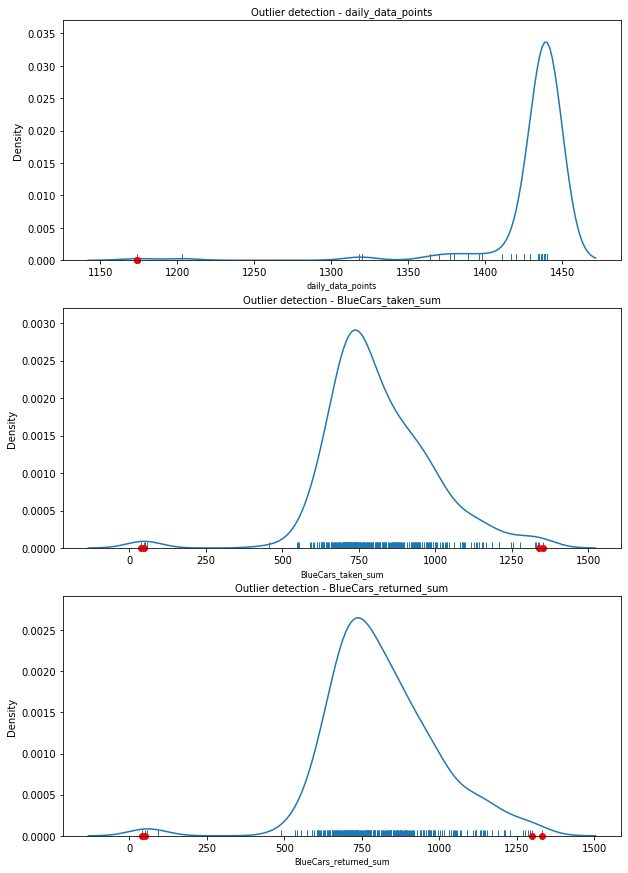

In [42]:
#Values marked with a red dot below in the x-axis of the graph are the ones that are removed
#from the column based on the set threshold percentile (95 in our case), and
#is also the default value when it comes to percentile-based outlier removal.

def percentile_based_outlier(data, threshold=99):
    diff = (100 - threshold) / 2
    minval, maxval = np.percentile(data, [diff, 100 - diff])
    return (data < minval) | (data > maxval)

col_names= ['daily_data_points','BlueCars_taken_sum','BlueCars_returned_sum']
                      #  'Utilib_taken_sum','Utilib_returned_sum','Utilib_14_taken_sum','Utilib_14_returned_sum','Slots_freed_sum','Slots_taken_sum']


fig, ax = plt.subplots(len(col_names), figsize=(10,15))

for i, col_val in enumerate(col_names):
    x = Autolib_data[col_val]
    sns.distplot(x, ax=ax[i], rug=True, hist=False)
    outliers = x[percentile_based_outlier(x)]
    ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    ax[i].set_title('Outlier detection - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

#Exploratory Analysis


**Univariate analysis**

*Timeseries for number of daily cars taken and returned*

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


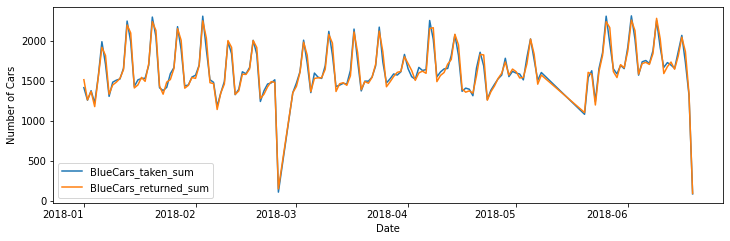

In [43]:
#Now determine the most popular hour of the day for picking.

Autolib_data['date'] = pd.to_datetime(Autolib_data['date'])

fig, axs = plt.subplots(figsize=(12, 4))

Autolib_data.groupby(Autolib_data["date"])['BlueCars_taken_sum','BlueCars_returned_sum'].sum().plot(kind='line', rot=0, ax=axs)
 
plt.xlabel("Date");  # custom x label using matplotlib

plt.ylabel("Number of Cars");

General traffic trends

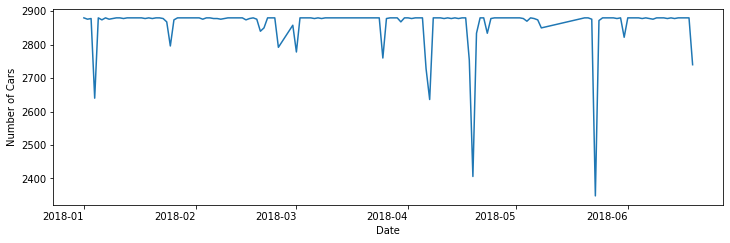

In [44]:

fig, axs = plt.subplots(figsize=(12, 4))

Autolib_data.groupby(Autolib_data["date"])['daily_data_points'].sum().plot(kind='line', rot=0, ax=axs)
 
plt.xlabel("Date");  # custom x label using matplotlib

plt.ylabel("Number of Cars");

*Traffic per day of week*

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


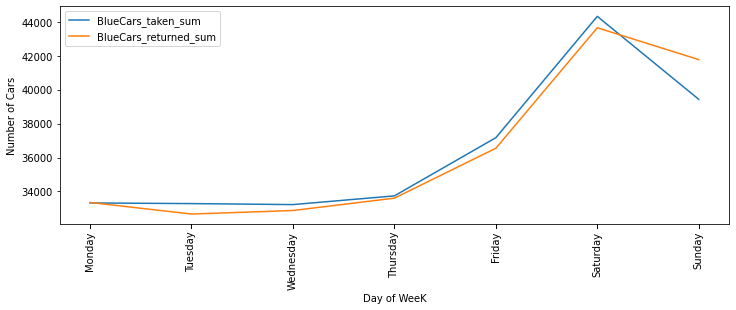

In [45]:
#Now determine the most popular hour of the day for picking.

Autolib_data['date'] = pd.to_datetime(Autolib_data['date'])

fig, axs = plt.subplots(figsize=(12, 4))

Autolib_data.groupby(Autolib_data['day_of_Week'])['BlueCars_taken_sum','BlueCars_returned_sum'].sum().plot(kind='line', rot=0, ax=axs)
 
plt.xlabel("Day of WeeK");  # custom x label using matplotlib

plt.ylabel("Number of Cars");

labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'];
plt.xticks(Autolib_data['day_of_Week'], labels, rotation='vertical')
plt.show()

*Trafic per Postal code top 20*

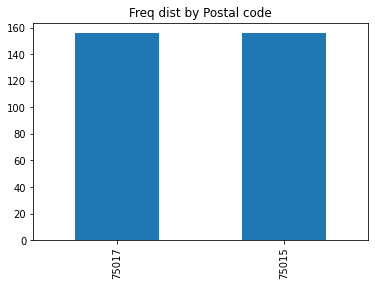

In [46]:

Autolib_data['Postal_code'].value_counts().plot.bar(title='Freq dist by Postal code')

#*univariate distribution of the numerical columns*

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

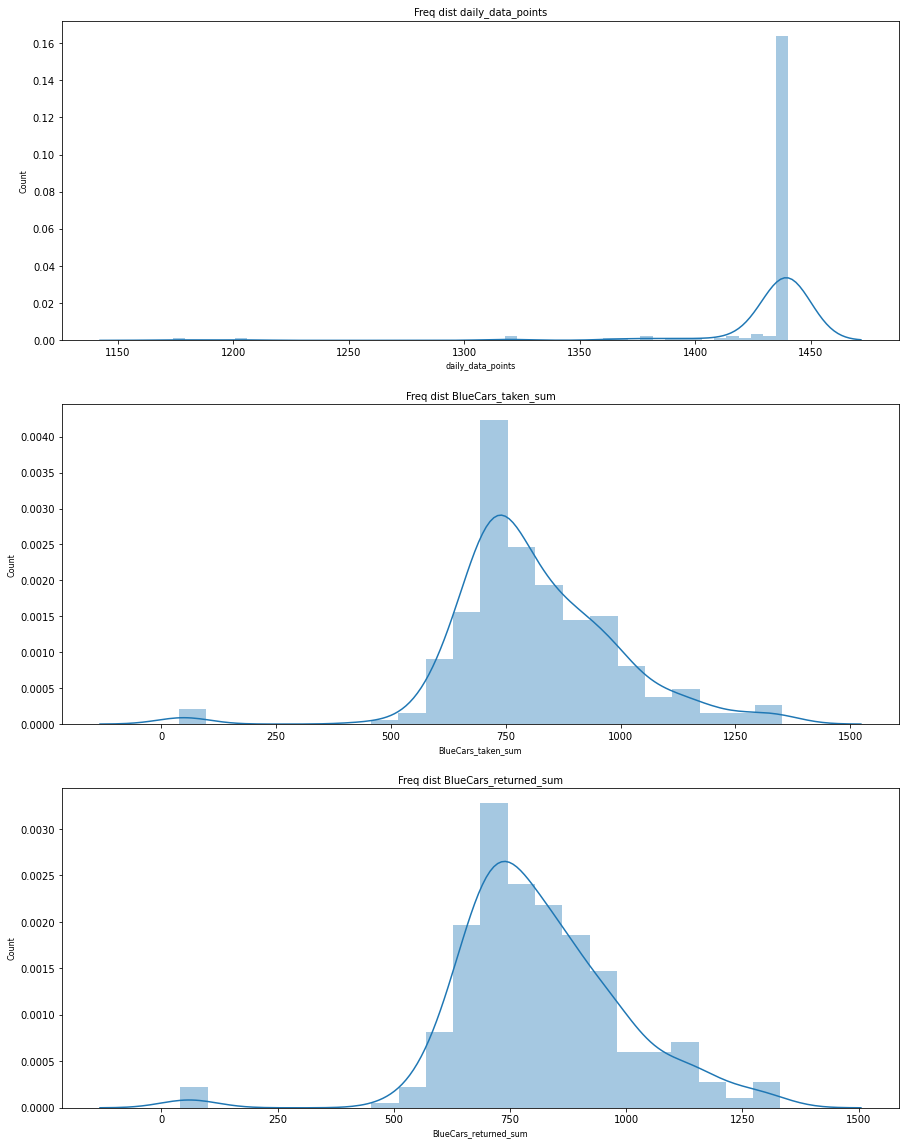

In [47]:
#We use displot of the seaborn library to plot this graph
col_names = ['daily_data_points','BlueCars_taken_sum','BlueCars_returned_sum']

fig, ax = plt.subplots(len(col_names), figsize=(15,20))

for i, col_val in enumerate(col_names):

    sns.distplot(Autolib_data[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

#**BIVARIATE ANALYSIS**

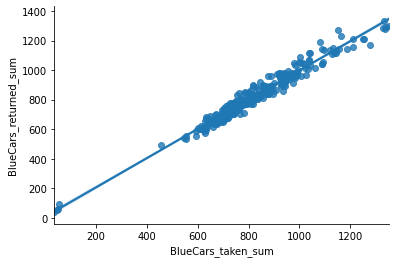

In [55]:
sns.regplot(x='BlueCars_taken_sum', y='BlueCars_returned_sum', data=Autolib_data) 
sns.despine();

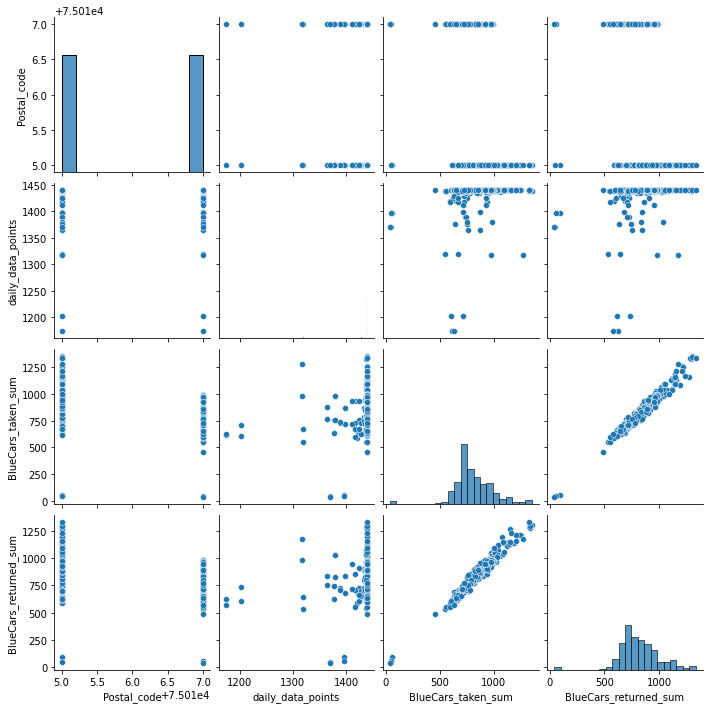

In [48]:
#The bivariate distribution plots help us to study the relationship between two variables by analyzing the scatter plot, 
#and we use the pairplot() function of the seaborn package to plot the bivariate distributions.
subset_Autolib_data= Autolib_data[['Postal_code','daily_data_points','BlueCars_taken_sum','BlueCars_returned_sum']]
sns.pairplot(subset_Autolib_data)

**The correlation matrix**

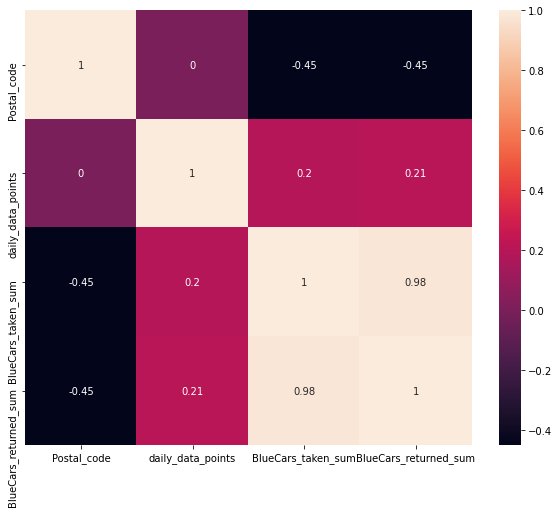

In [49]:
#This analysis allows you to see which pairs have the highest correlation, the pairs which are highly correlated
#represent the same variance of the dataset thus we can further analyze them to understand which attribute among 
#the pairs are most  significant for building the model.

f ,ax = plt.subplots(figsize=(10, 8))
corr = subset_Autolib_data.corr()
sns.heatmap(corr,annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

As revealed above blue cars taken highly correlate to blue cars returned but has no correlation to daily traffic which could be derived from daily data points.

#TEST OF HYPOTHESIS

**Hypothesis Formulation**



*   **Null Hypothesis**: There is a significant difference in the average number of Bluecars taken during the weekend in postal code 75015 in comparison to those taken in postal code 75017

> Indented block


*   **Alternate Hypothesis**:There is no significant difference in the average number of Bluecars taken during the weekend in postal code 75015 in comparison to those taken in postal code 75017


**Significance of the Hypothesis**

From historical data it has been observed that weekends are the bussiest days for autolib car hiring.The high customer traffic during the weekend can be attributed to high costomters in recreational areas.Autolib company wish to add more cabs in area with more recreation facilities of which postal code area 75015 and 75017 standout.So as to make a decission which of the two has high traffic to be alocated more cabs we carryout a test of hypothesis.

**Test statistic**

We will use a Two sampled T-test because:-The Independent Samples t Test or 2-sample t-test compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. 

* Our data points are independent of  each other. Thus none of the data points has influence on the other data point.
* Our data is normally distributed.
* Our sample data contains data point where each item has an equal chance of being selected.
* Both Sample sizes will be equal.

**Sampling**


For us to compare samples from the two different postal codes (75015 and 75017) we will use cluster sampling because the data is already grouped in clusters of postal codes. Furthermore, both clusters have equal data points hence each item has equal chance of being selected hence reflective of the target population. 

**Significance Level**
The level of significance is the probability of rejecting the null hypothesis when it is true. For this test, the significance level is set at 0.05 equivalent of 5%.

Implying that if the p-value calculated from the test statistic is less than 0.05 then the null hypothesis is rejected. If the value is greater than or equal to 0.05 then we fail to reject the null hypothesis




**Critical Value**

For this test the alpha level  has been set at 0.05.

**Test of Hypothesis Computation**

Select the samples

In [98]:
Bluecars_75015=Autolib_data[Autolib_data.Postal_code.isin([75015])]
Bluecars_75017=Autolib_data[Autolib_data.Postal_code.isin([75017])]

Filter out the weekends

In [99]:

Postalcode_75015=pd.DataFrame(Bluecars_75015[Bluecars_taken_75015.day_type.isin(['weekend'])])
Postalcode_75017=pd.DataFrame(Bluecars_75017[Bluecars_taken_75017.day_type.isin(['weekend'])])

Compute mean

In [108]:
mean_75015 = Postalcode_75015["BlueCars_taken_sum"].mean()
mean_75017 = Postalcode_75017['BlueCars_taken_sum'].mean()
print("Postalcode_75015_mean:",mean_75015)
print("Postalcode_75017_mean:",mean_75017)

Postalcode_75015_mean: 1072.7727272727273
Postalcode_75017_mean: 831.0227272727273


Compute std

In [110]:
std_75015 = Postalcode_75015["BlueCars_taken_sum"].std()
std_75017 = Postalcode_75017["BlueCars_taken_sum"].std()
print("Postalcode_75015_std:",std_75015 )
print("Postalcode_75017_std:",std_75017 )

Postalcode_75015_std: 211.90913625796864
Postalcode_75017_std: 159.84345374151835


Compute Two sampled T-test

In [112]:

ttest,pval = ttest_ind(Postalcode_75015["BlueCars_taken_sum"],Postalcode_75015["BlueCars_taken_sum"])
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

p-value 1.0
we accept null hypothesis


#*Calculate the power of a t-test for two independent sample*

**Parameters**

**effect_sizefloat**

standardized effect size, difference between the two means divided by the standard deviation. effect_size has to be positive.

**nobs1int or float**

number of observations of sample 1. The number of observations of sample two is ratio times the size of sample 1, i.e. nobs2 = nobs1 * ratio

**alphafloat in interval (0,1)**
significance level, e.g. 0.05, is the probability of a type I error, that is wrong rejections if the Null Hypothesis is true.

**ratiofloat**
ratio of the number of observations in sample 2 relative to sample 1. see description of nobs1 The default for ratio is 1; to solve for ratio given the other arguments, it has to be explicitly set to None.

**dfint or float**
degrees of freedom. By default this is None, and the df from the ttest with pooled variance is used, df = (nobs1 - 1 + nobs2 - 1)

**alternativestr**, ‘two-sided’ (default), ‘larger’, ‘smaller’
extra argument to choose whether the power is calculated for a two-sided (default) or one sided test. The one-sided test can be either ‘larger’, ‘smaller’.

**Returns**
powerfloat
Power of the test, e.g. 0.8, is one minus the probability of a type II error. Power is the probability that the test correctly rejects the Null Hypothesis if the Alternative Hypothesis is true.

In [122]:
from statsmodels.stats.power import TTestIndPower


effect_size=(mean_75015-mean_75017)/std_75015


nobs1=160

alpha=0.05


ratio=(160/160)

df = 359 #(nobs1 - 1 + nobs2 - 1)
alternativestr= ('two-sided')

#Returns Power of the test
Power = TTestIndPower.power(effect_size, nobs1, alpha, ratio, df, alternative='two-sided')

print("The  t-testpower for the two independent samples is:",Power,'Equivalent of',Power*100,"%" )

The  t-testpower for the two independent samples is: 1.0 Equivalent of 100.0 %


Power of the test, is one minus the probability of a type II error. Power is the probability that the test correctly rejects the Null Hypothesis if the Alternative Hypothesis is true.


Our result show that we have a power of **1** thus test results are 100% significant.

#*Results Interpretation*

Given the high  power for the of test we interpret the result as.

There is a diffrence in Blue cars taken from postal code  75015 in comparision to those taken at postal code 75017 during the weekend at 95% confidence interval.

#*Challenging the solution*

*Further analysis could be carried out via ANOVA*

#*Follow up questions*
*At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.*

* Did we have the right data? *yes*
* Do we need other data to answer our question? *yes*

